In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

uri = r'./outputsx/merged_บ้านสบป้าด.csv.csv'

data = pd.read_csv(uri, encoding='utf-8')
data['Datetime'] = pd.to_datetime(data['Datetime'])
data['Date'] = data['Datetime'].dt.date
data['Hour'] = data['Datetime'].dt.hour


In [8]:
data.head(2)

,Datetime,Value_BP,ValueLn_BP,Value_DEV,ValueLn_DEV,Value_NO2,ValueLn_NO2,Value_PM10,ValueLn_PM10,Value_RAIN,...,Value_TEMP,ValueLn_TEMP,Value_TSP,ValueLn_TSP,Value_WD,ValueLn_WD,Value_WS,ValueLn_WS,Date,Hour
0,2010-01-01 01:00:00,970.0,970.0,36.0,36.0,2.0,2.0,19.0,19.0,0.0,...,17.37,17.37,20.0,20.0,109.0,109.0,0.08,0.08,2010-01-01,1
1,2010-01-01 02:00:00,969.0,969.0,36.0,36.0,2.0,2.0,10.0,10.0,0.0,...,16.80,16.80,11.0,11.0,157.0,157.0,0.10,0.10,2010-01-01,2


In [9]:
# Creating a pivot table
pivot_data = data.pivot_table(values='ValueLn_SO2', index='Date', columns='Hour', aggfunc='mean')


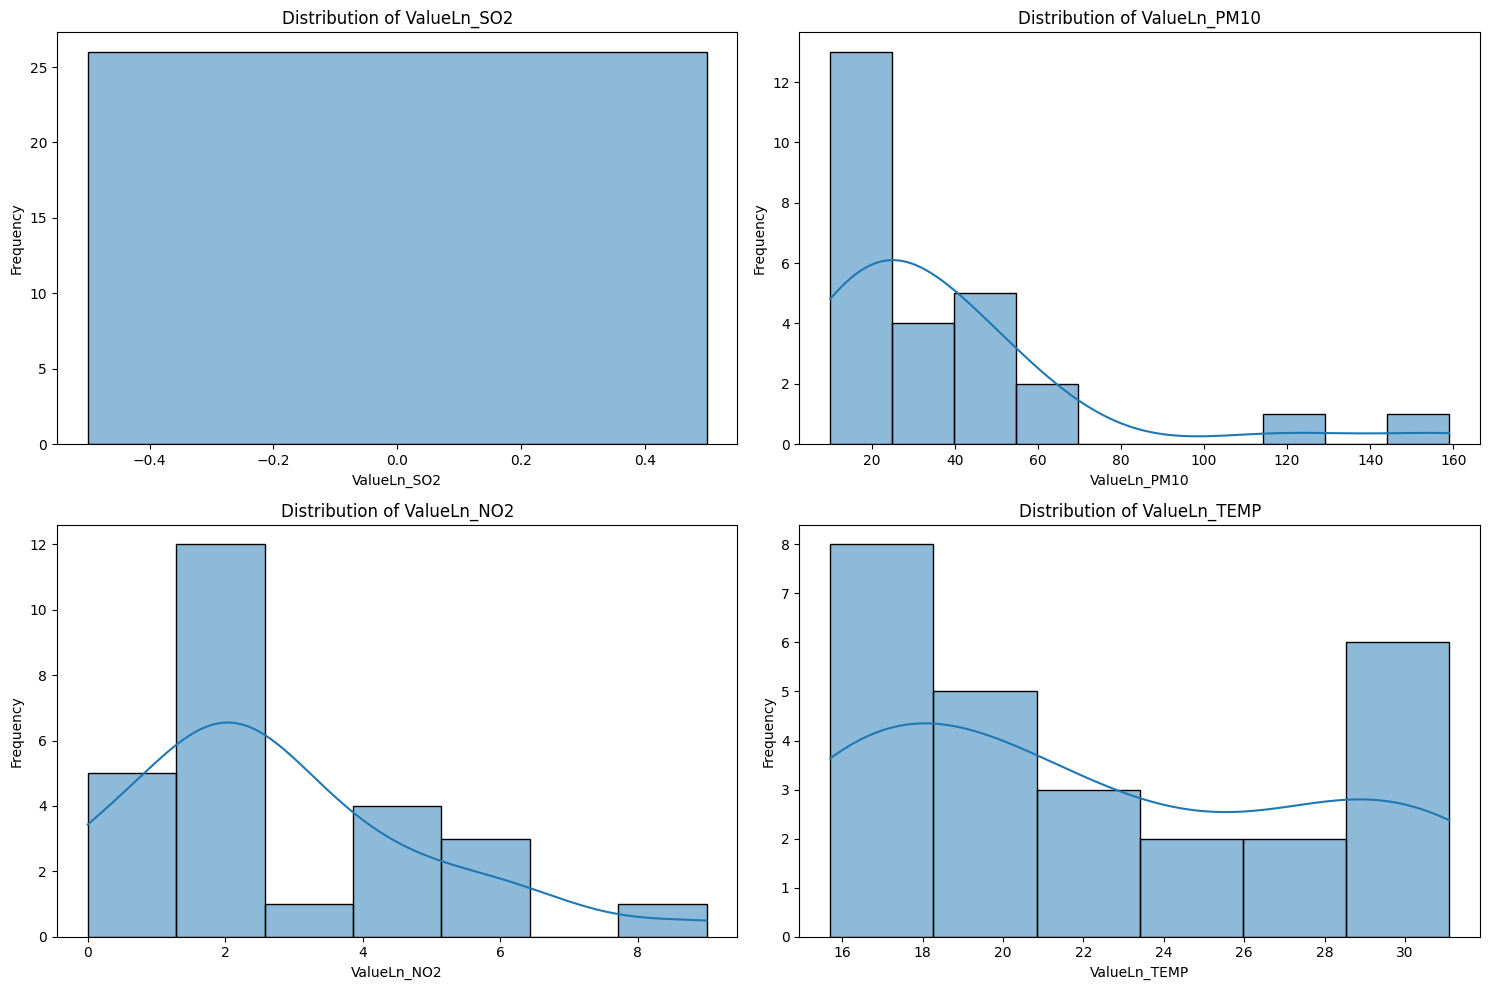

TypeError: float() argument must be a string or a number, not 'datetime.date'

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Datetime' to datetime type for better handling
data['Datetime'] = pd.to_datetime(data['Datetime'])

# Descriptive statistics for numerical columns
desc_stats = data.describe()

# Plotting histograms for a selection of key variables
key_variables = ['ValueLn_SO2', 'ValueLn_PM10', 'ValueLn_NO2', 'ValueLn_TEMP']

plt.figure(figsize=(15, 10))
for i, var in enumerate(key_variables, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[var], kde=True)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Correlation matrix heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

desc_stats, key_variables
